In [1]:
from pywarpx import picmi
from icecream import ic
import yt
import unyt
from yt import derived_field
yt.enable_parallelism()

# # %%
# @derived_field(name="density_e", sampling_type="local",display_name=r"\rho_e",units="cm**-3")
# def _density_e(field, data):
#     return data['openPMD','rho-electron']/ unyt.qe

# @derived_field(name="density_p", sampling_type="local",units="cm**-3")
# def _density_p(field, data):
#     return data['openPMD','rho-proton']/unyt.qp

# @derived_field(name="density", sampling_type="local",units="cm**-3")
# def _density(field, data):
#     return data['openPMD','rho-proton']/unyt.qp - data['openPMD','rho-electron']/unyt.qe

False

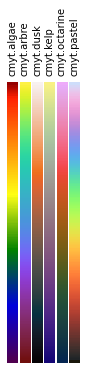

In [3]:
yt.show_colormaps(    
    subset=[
        "cmyt.algae",
        "cmyt.arbre",
        "cmyt.dusk",
        "cmyt.kelp",
        "cmyt.octarine",
        "cmyt.pastel",
    ],)

In [2]:
plotfile = 'diags/diag2/plt??????'
ts = yt.load(plotfile)

ds = ts[0]
ad=  ds.all_data()
ic(ds.particle_types,
    ds.particle_type_counts,
    ds.domain_width,
    # ds.field_list,
    # ds.derived_field_list,
)
for f in ds.field_list:
    if 'all' in f or 'nbody' in f: continue
    fv = ad[f]
    if fv.size == 0: continue
    ic(f, fv.min(), fv.max(),fv.mean())

# ad.get_bbox()
# ds.print_stats()

yt : [INFO     ] 2022-05-20 23:04:34,949 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-20 23:04:34,950 Parameters: domain_dimensions         = [2 2 1]
yt : [INFO     ] 2022-05-20 23:04:34,951 Parameters: domain_left_edge          = [19889.71698345     0.             0.        ]
yt : [INFO     ] 2022-05-20 23:04:34,952 Parameters: domain_right_edge         = [2.78456038e+04 7.95588679e+03 1.00000000e+00]
ic| ds.particle_types: ()
    ds.particle_type_counts: {}
    ds.domain_width: unyt_array([7.95588679e+03, 7.95588679e+03, 1.00000000e+00], 'code_length')
ic| f: ('boxlib', 'Bx')
    fv.min(): unyt_quantity(0., 'T')
    fv.max(): unyt_quantity(0., 'T')
    fv.mean(): unyt_quantity(0., 'T')
ic| f: ('boxlib', 'By')
    fv.min(): unyt_quantity(0., 'T')
    fv.max(): unyt_quantity(0., 'T')
    fv.mean(): unyt_quantity(0., 'T')
ic| f: ('boxlib', 'Bz')
    fv.min(): unyt_quantity(0., 'T')
    fv.max(): unyt_quantity(0., 'T')
    fv.mean(): unyt_quantity(0., 'T')
ic| f: 

In [3]:
ds.domain_width

yt : [INFO     ] 2022-05-20 23:06:15,518 xlim = 19889.716983 27845.603777
yt : [INFO     ] 2022-05-20 23:06:15,518 ylim = 0.000000 7955.886793
yt : [INFO     ] 2022-05-20 23:06:15,519 xlim = 19889.716983 27845.603777
yt : [INFO     ] 2022-05-20 23:06:15,519 ylim = 0.000000 7955.886793
yt : [INFO     ] 2022-05-20 23:06:15,520 Making a fixed resolution buffer of (('boxlib', 'Ex')) 800 by 800
yt : [INFO     ] 2022-05-20 23:06:15,525 Making a fixed resolution buffer of (('boxlib', 'Ey')) 800 by 800
yt : [INFO     ] 2022-05-20 23:06:15,530 Making a fixed resolution buffer of (('boxlib', 'Ez')) 800 by 800
yt : [WARNING  ] 2022-05-20 23:06:15,541 Plotting ('boxlib', 'Ex'): All values = 0.0 V/m
yt : [WARNING  ] 2022-05-20 23:06:15,542 Switching to linear colorbar scaling.
yt : [WARNING  ] 2022-05-20 23:06:15,604 Plotting ('boxlib', 'Ez'): All values = 0.0 V/m
yt : [WARNING  ] 2022-05-20 23:06:15,604 Switching to linear colorbar scaling.
yt : [WARNING  ] 2022-05-20 23:06:15,664 Plotting ('boxli


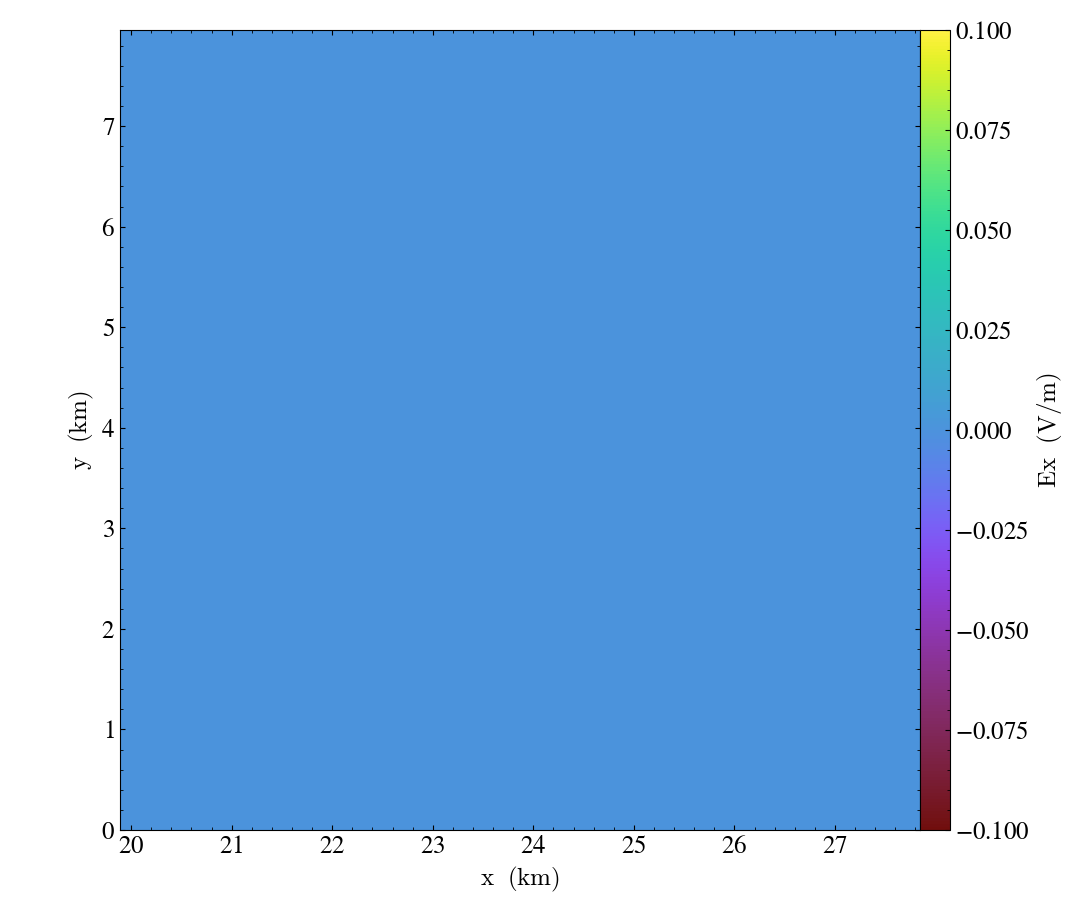
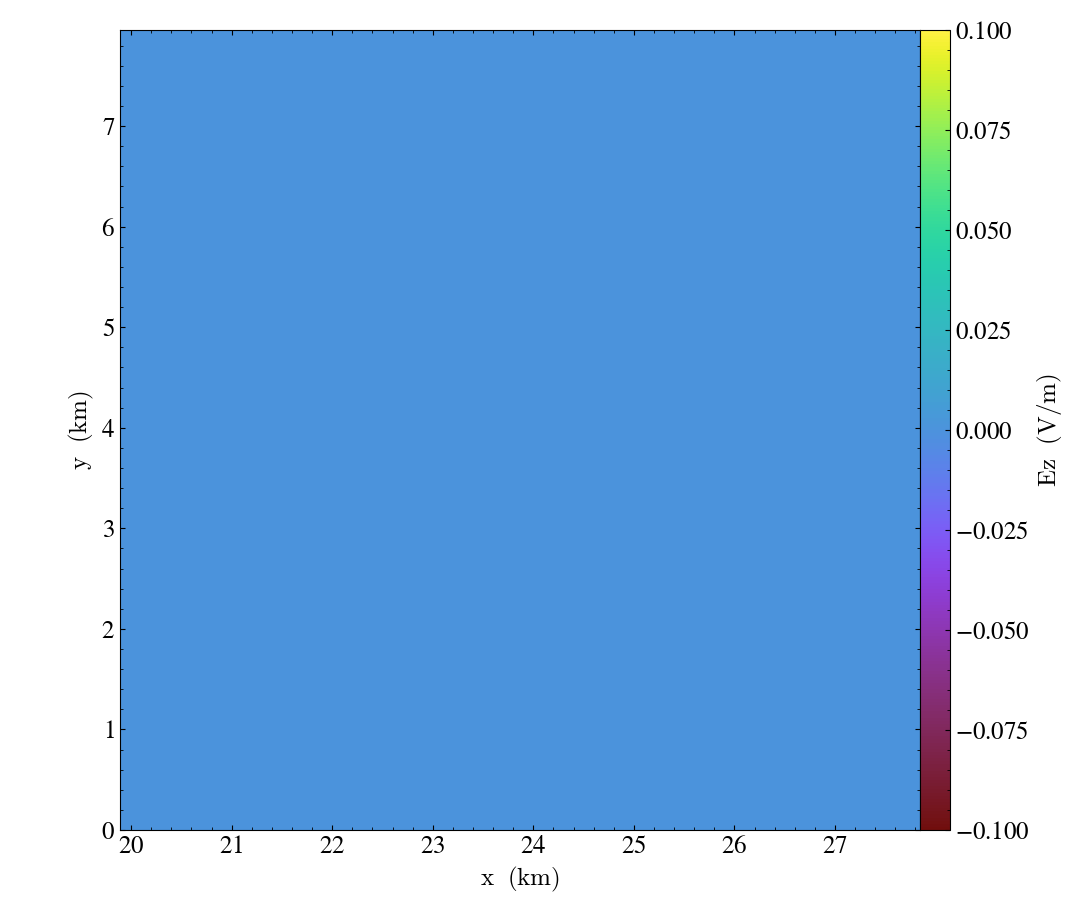
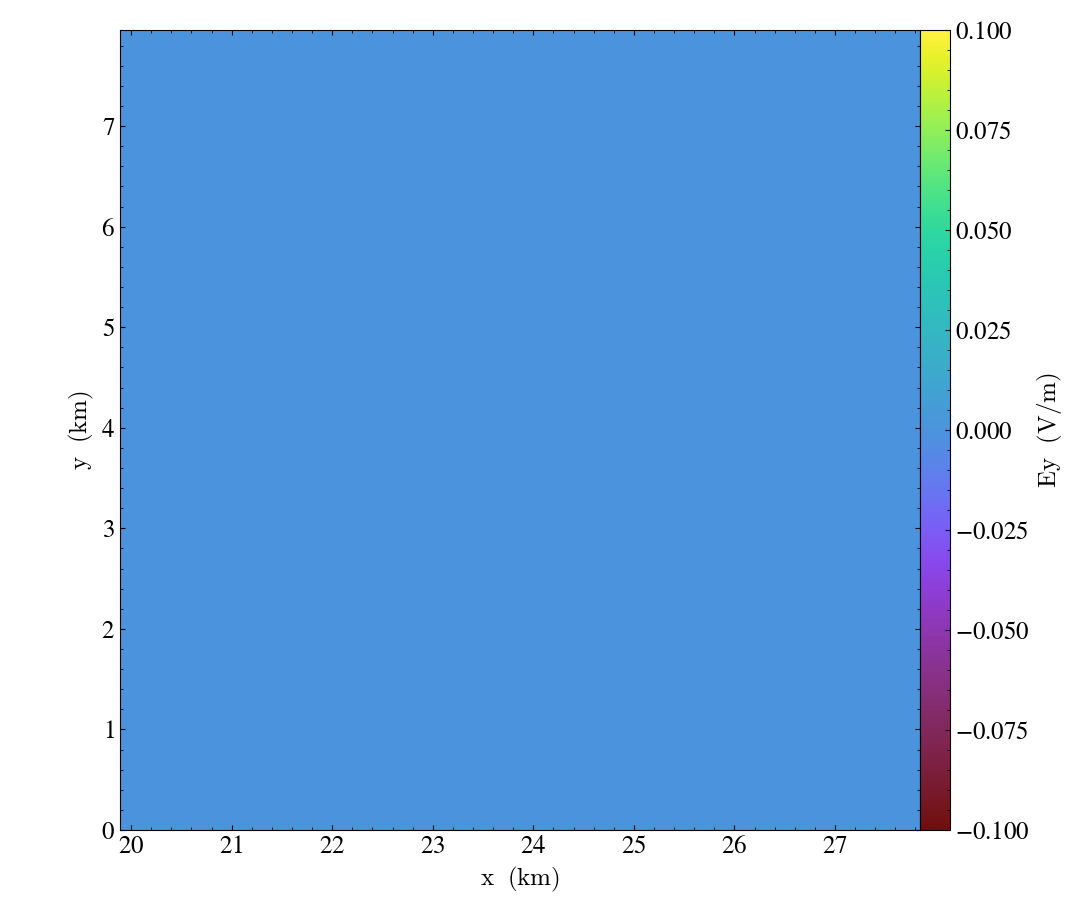

In [6]:
fields = [
    ("boxlib", "Ex"),
    ("boxlib", "Ey"),
    ("boxlib", "Ez"),
]

slc = yt.SlicePlot(
    ds, "z", fields, origin="native"
)  # Create a sliceplot object
slc.show()

In [ ]:
ps = 'proton'
ds.index
ds.field_info[ps,'particle_momentum_x'].take_log = False
ds.field_info[ps,'particle_momentum_y'].take_log = False
# p=  yt.ParticlePlot( ds, (ps,'particle_position_x'), (ps,'particle_position_y'), (ps,'particle_momentum_y'))
# p =  yt.ParticlePlot(ds, (ps,'particle_position_x'), (ps,'particle_momentum_y'), (ps,'particle_weight'))
# p.show()
x_field = (ps,'particle_momentum_x')
y_field = (ps,'particle_momentum_y')
z_fields = (ps,'particle_weight')

name = "{}_{}_2d-Profile_{}_{}_{}}".format(str(ds))
middle = "2d-Profile_{xfn}_{yfn}_{_f}"

p =  yt.ParticlePlot(ds, x_field, y_field , z_fields)
p.save()
# ps = 'electron'
# p =  yt.ParticlePlot(ds, (ps,'particle_momentum_x'), (ps,'particle_momentum_y'), (ps,'particle_weight'))
# p.show()

In [ ]:
diag_name = 'openpmd_'
plotfile = './diags/diag2/*.h5'.format(diag_name)
ts = yt.load(plotfile)
ds = ts[-1]
p=  yt.ParticlePhasePlot( ds.all_data(), ('electron','particle_velocity_x'), ('electron','particle_velocity_z'), ('electron','particle_mass'))
p.show()

In [ ]:
slc = yt.SlicePlot(ds, "z", [('gas', 'density_e'),('gas', 'density_p') ,('gas', 'density') ] ,origin="native")
slc.show()

In [ ]:
from pywarpx import picmi
import yt
yt.enable_parallelism()

def _density_e(field, data):
    from pywarpx import picmi
    q_e = picmi.constants.q_e
    
    return - data['boxlib','rho_e-']/q_e

yt.add_field(
    "density_e",
    function=_density_e,
    sampling_type="local",
)

# %%
diag_name = 'plt'
plotfile = './diags/plotfiles/{}??????'.format(diag_name)
ts = yt.load(plotfile)

from pathlib import Path

subdirectories = ["figures"]
for path in subdirectories:
    Path(path).mkdir(parents=True, exist_ok=True)

# %%
_check = 1
if _check:
    from icecream import ic
    ds = ts[0]
    ic(ds.time_unit)
    ic(ds.current_time)
    ic(ds.derived_field_list)